In [1]:
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [2]:
messages=pd.read_csv('spam.csv',encoding = "ISO-8859-1")

Data Analysis And Visualization

In [3]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
messages.rename(columns={'v1':'Label','v2':'Message'},inplace=True)

In [5]:
messages.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
messages['Msg_length']=messages['Message'].apply(len)

In [9]:
messages.head()

,Label,Message,Msg_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:xlabel='Label', ylabel='count'>

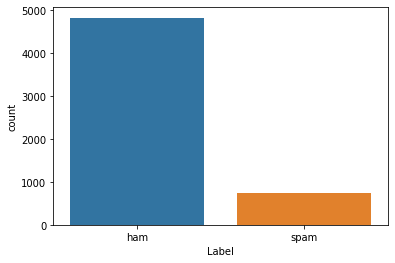

In [10]:
sns.countplot(data=messages,x='Label')

<AxesSubplot:xlabel='Msg_length', ylabel='Count'>

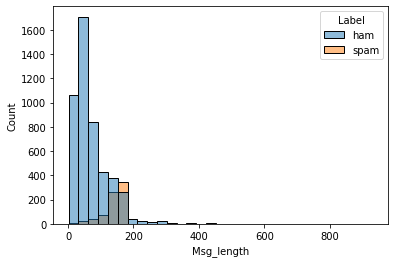

In [11]:
sns.histplot(data=messages,x='Msg_length',binwidth=30,hue='Label')

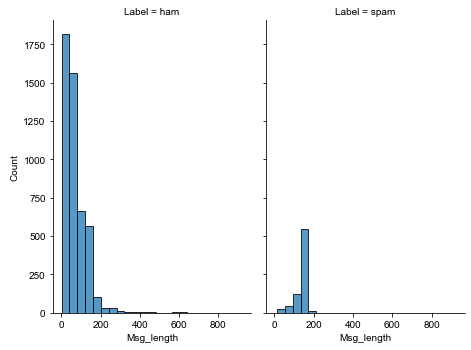

In [12]:
g=sns.FacetGrid(messages,col='Label',height=5,aspect=10/15)
g.map(sns.histplot,'Msg_length',binwidth=40)
sns.set_style('darkgrid')


Data Preprocessing

In [13]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
tag=['a','s','r','n','v']

In [16]:
def Pre_process(sentence):
    punc=[c for c in sentence if c not in string.punctuation]
    punc=''.join(punc)
    stopword_removed = [word.lower() for word in punc.split() if word.lower() not in stopwords.words('english')]
    #for j in range(0,len(stopword_removed)):
    #    for i in range(0,len(tag)):
    #        stopword_removed[j]=ps.stem(lemmatizer.lemmatize(stopword_removed[j],pos=tag[i]))
    #sen=', '.join(stopword_removed)
    return stopword_removed



In [18]:
messages['Message'].apply(Pre_process).head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

Machine Learning

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [20]:
m_train,m_test,l_train,l_test=train_test_split(messages['Message'],messages['Label'],test_size=0.3)

In [21]:
pipeline=Pipeline([
    ('bw',CountVectorizer(analyzer=Pre_process)),
    ('tfidf',TfidfTransformer()),
    ('NB',MultinomialNB())
])

In [22]:
pipeline.fit(m_train,l_train)

Pipeline(steps=[('bw',
                 CountVectorizer(analyzer=<function Pre_process at 0x0000025E2D2CF1F0>)),
                ('tfidf', TfidfTransformer()), ('NB', MultinomialNB())])

In [23]:
pred=pipeline.predict(m_test)

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
print(classification_report(l_test,pred))
print('Confusion Matrix\n')
print(confusion_matrix(l_test,pred))


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1439
        spam       1.00      0.73      0.85       233

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.96      0.96      0.96      1672

Confusion Matrix

[[1439    0]
 [  62  171]]
